# Default Loan Prediction
## Final Project 
## By Nicolas Obregon

## Introduction and Research Topic

### Research Question

### Motivation




## Data overview, cleaning and pre-processing

The dataset was collected from kaggle (https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior/version/1?select=Training+Data.csv), a webpage that contains multiple datasets for users to solve problems or create novel coding projects.

It consists of three csv files:

*   The first **(TrainingData.csv)**, used here, is the training data file which has users with 12 features describing them, and a risk flag (which is either 1 (person defaulted) or 0 (person did not default)) which indicates if the individual has defaulted in the past or not. Our machine learning model will mainly learn from the contents of this folder.
  * Most of the variables are object types so I will convert them immediatly to category types

*   The second is the test data **(TestData.csv)** dataset, which includes new id's and their features but no risk default. With this data set I will predict possible defaulting individuals.

* The third file is the Sample Prediction Dataset **(SamplePredictionDataset.csv)**, here I will later combine the predictions to see if they are correct or not.

### Variables
There are 13 variables, here they are explained in detail:
* Variables that are important to know to keep track of what is going on, but otherwise have no effect on the analysis:
  * **Id**: Self-explanatory
  * **Income**: States in Indian rupees the individuals income
  * **Age**: States the users age
  * **Experience**: States the users years of work experience 
  * **Relationship_Status**: States if the user is married or single
  * **House_Ownership**: States if the user rents or owns a house or neither
  * **Car_Ownership**: States if the user owns a car
  * **Profession**: The proffesion of the user 
  * **CITY and STATE**: Self-explanatory
  * **CURRENT_JOB_YRS**: The years the user has been at their current job
  * **CURRENT_HOUSE_YRS**: Years user has been in their house
  * **Risk_Flag**: Whether the user has defaulted or not.
    * This is the Class Variable (0 or 1)

### Libraries


In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Import to split training and test data
from sklearn.model_selection import train_test_split

### Data Type Cleaning

Before I start doing the project I want to have the correct data.

I can see below that many variables are object types.

In [ ]:
df = pd.read_csv("TrainingData.csv", index_col = 0)

#dfTest = pd.read_csv('TestData.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [ ]:
dfOriginal=df.copy()
#dfTestOriginal=dfTest.copy()

I will immediatly change the object type variables to category.

In [ ]:
df = pd.read_csv("TrainingData.csv", index_col = 0, 
                 dtype={'Income': int, 'Age': int,
                        'Experience': int, 'Married/Single': 'category',
                        'House_Ownership': 'category', 'Car_Ownership': 'category',
                        'Profession': 'category', 'CITY': 'category',
                        'STATE': 'category', 'CURRENT_JOB_YRS': int,
                        'CURRENT_JOB_YRS': int, 'CURRENT_HOUSE_YRS': int,
                        'Risk_Flag': int}
                 #,na_values = ['n/a', ' ', '', '-']
                 )
print('the set has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

df

the set has 252000 rows and 12 columns


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0


As well as the **Married/Single** variable as it is annoying to write

In [ ]:
df = df.rename(columns = {'Married/Single':'Relationship_Status'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Income               252000 non-null  int64   
 1   Age                  252000 non-null  int64   
 2   Experience           252000 non-null  int64   
 3   Relationship_Status  252000 non-null  category
 4   House_Ownership      252000 non-null  category
 5   Car_Ownership        252000 non-null  category
 6   Profession           252000 non-null  category
 7   CITY                 252000 non-null  category
 8   STATE                252000 non-null  category
 9   CURRENT_JOB_YRS      252000 non-null  int64   
 10  CURRENT_HOUSE_YRS    252000 non-null  int64   
 11  Risk_Flag            252000 non-null  int64   
dtypes: category(6), int64(6)
memory usage: 15.2 MB


It is working fine, I can move on.

### Missing Values

I can see below that there are no missing values

In [ ]:
na_values = df.isna().sum()

na_values

Income                 0
Age                    0
Experience             0
Relationship_Status    0
House_Ownership        0
Car_Ownership          0
Profession             0
CITY                   0
STATE                  0
CURRENT_JOB_YRS        0
CURRENT_HOUSE_YRS      0
Risk_Flag              0
dtype: int64

### Describe Numericals

Using the describe() function, I can see some important things:

*  The risk flag mean is 0.12, meaning that **most individuals have not defaulted**. 

* Income mean is quite high, and the max is so as well, but the min is extremely low (10310 Indian Rupees are 140 USD approximately) 
  * **This could be an outlier, I will consider this later**

* Age is appropriately dispersed

* All variables have the same count, so there are no missing values

In [ ]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Describe Categoricals

Here I can describe the categorical variables.

When doing categorical variables, **top** is the most common value and **freq** is the frequency of the most common value.

* There are 51 different professions displayed, 317 different cities, and 29 states

* All variables have the same count, so there are no missing values again, meaning the data is good

In [ ]:
categorical_info = df[['Relationship_Status','House_Ownership', 'Car_Ownership',
                        'Profession', 'CITY', 'STATE']].describe()

categorical_info

,Relationship_Status,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


### Irregularities

As seen before, there were possible outliers in the income section, the max was extremely high and the min was extremely low. 

Let's visualize this

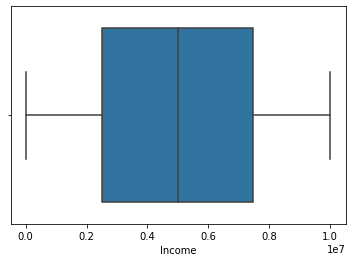

In [ ]:
# I can make a boxplot with the income variable and see that there are quite a lot of outliers, and the same with the minimum_nights variable

plot1 = plt.figure(1)
bp_price = sns.boxplot( x=df['Income'] )

plt.show()

### Outliers 'fixed'
Seeing it as a box plot makes it much more clear that there are no outliers, we can therefore move on.

### Basic visual analysis 

Here I will visualize some variables which I think are important

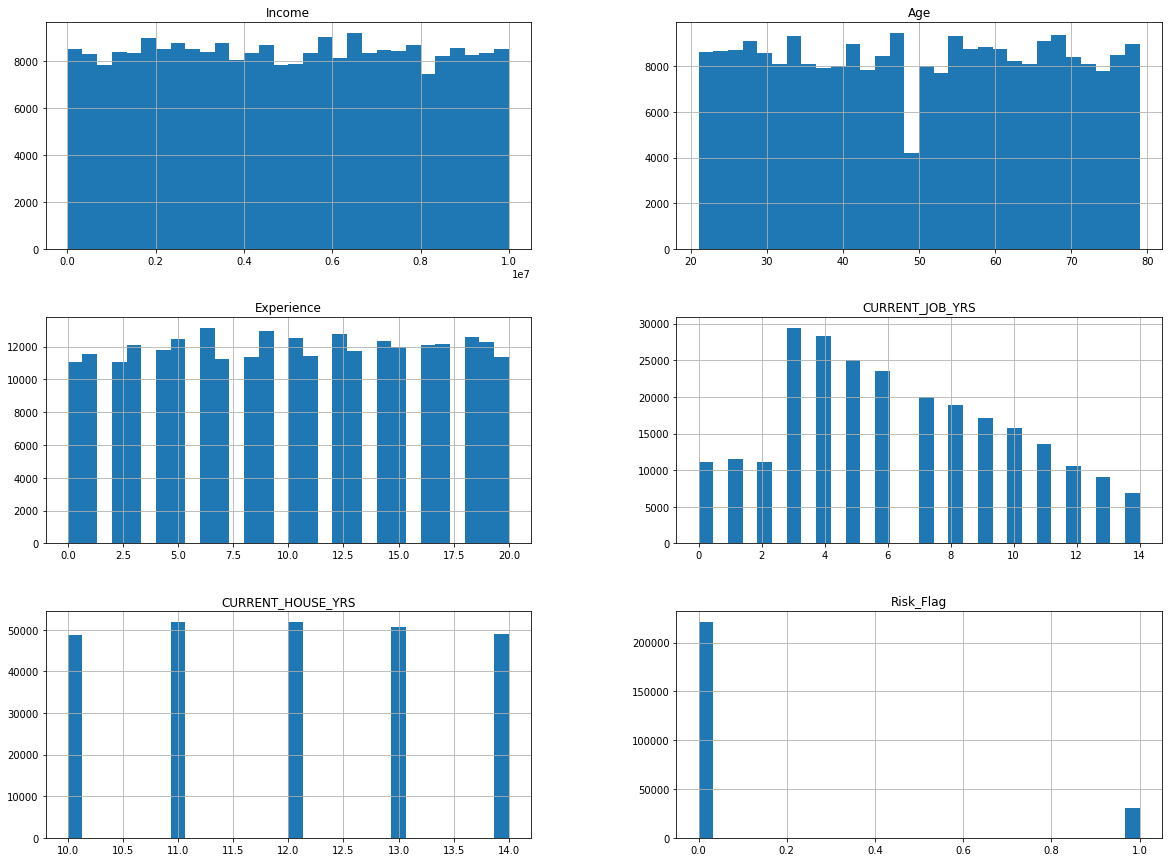

In [ ]:
#check variable distributions
df.hist(bins=30, figsize=(20,15))
plt.show()

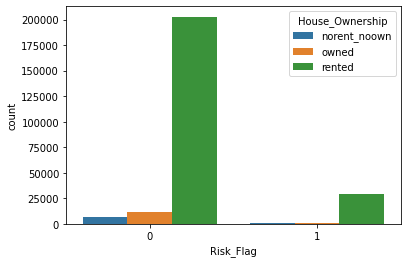

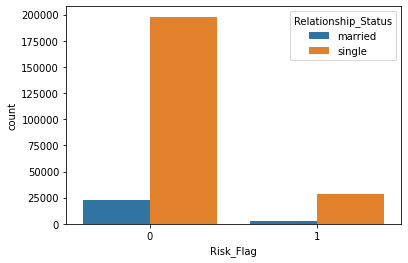

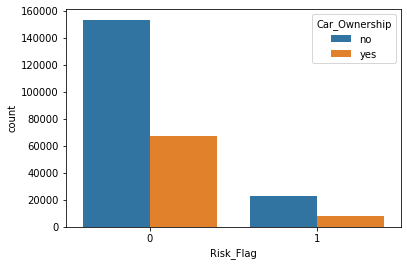

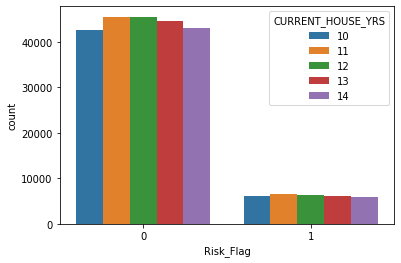

In [ ]:
sns.countplot(x='Risk_Flag' , data = df , hue = 'House_Ownership')
plt.show()

sns.countplot(x='Risk_Flag' ,data = df , hue = 'Relationship_Status')
plt.show()

sns.countplot(x='Risk_Flag' ,data = df , hue = 'Car_Ownership')
plt.show()

sns.countplot(x='Risk_Flag' ,data = df , hue = 'CURRENT_HOUSE_YRS')
plt.show()

More importantly, let's visualize the amount of defaulters vs non-defaulters. I can see the difference is great

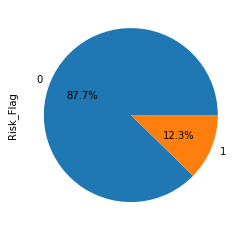

In [ ]:
df['Risk_Flag'].value_counts().plot.pie(autopct='%1.1f%%')

### Encoding

Now I must **encode** the values that I previously strongly typed as categories, so their values are more easily read by the algorithms I will be implementing [3].





In [ ]:
#Encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_columns = [df.Relationship_Status,df.House_Ownership,df.Car_Ownership,df.Profession,df.STATE,df.CITY]
for i in df_columns:
    i = le.fit_transform(i)

In [ ]:
# Now the values of categorical variables are integers instead of words as can be seen

df.Relationship_Status = le.fit_transform(df.Relationship_Status)
df.House_Ownership = le.fit_transform(df.House_Ownership)
df.Car_Ownership = le.fit_transform(df.Car_Ownership)
df.Profession = le.fit_transform(df.Profession)
df.STATE = le.fit_transform(df.STATE)
df.CITY = le.fit_transform(df.CITY)

df

,Income,Age,Experience,Relationship_Status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,1,2,0,33,251,13,3,13,0
2,7574516,40,10,1,2,0,43,227,14,9,13,0
3,3991815,66,4,0,2,0,47,8,12,4,10,0
4,6256451,41,2,1,2,1,43,54,17,2,12,1
5,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,1,2,0,45,162,28,6,11,0
251997,2843572,26,10,1,2,0,3,251,13,6,11,0
251998,4522448,46,7,1,2,0,17,144,14,7,12,0


### Correlation

Now that the data is perfectly clean, I will use all three **corr()** methods  '**pearson, kendall and spearman**' to see if there are any correlations with the variables. They all indicate a correlation between two variables with a number from -1 to 1 [1].
* -1 means negative correlation
* 0 means no correlation
* 1 means a total positive correlation

As it is encoded, the categorical values can appear in the chart.



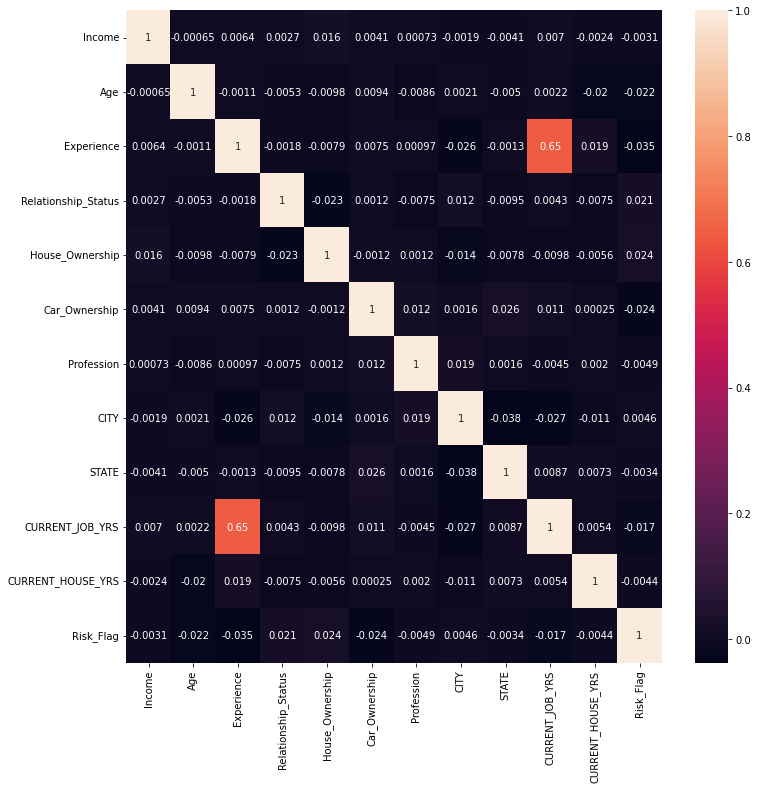

In [ ]:
df = pd.DataFrame(df)

plt.figure(figsize=(12,12))


corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

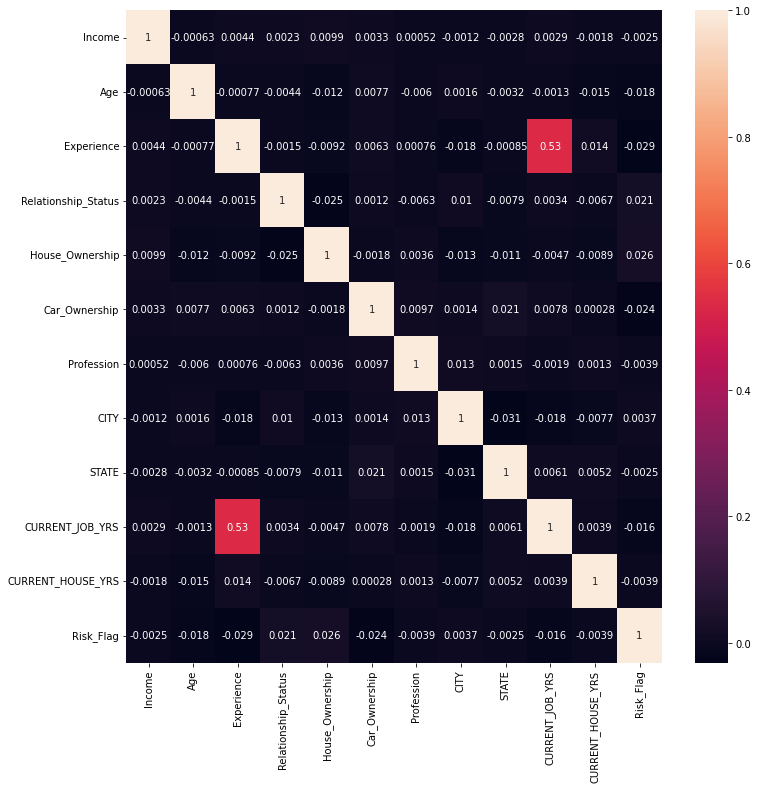

In [ ]:
df = pd.DataFrame(df)

plt.figure(figsize=(12,12))


corrMatrix = df.corr(method ='kendall')
sns.heatmap(corrMatrix, annot=True)
plt.show()

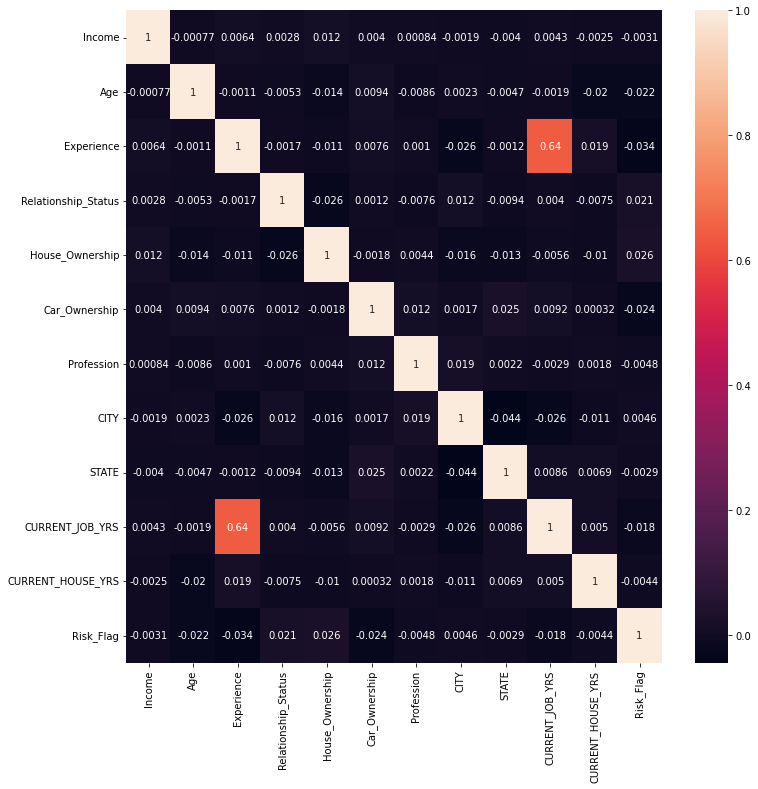

In [ ]:
df = pd.DataFrame(df)

plt.figure(figsize=(12,12))


corrMatrix = df.corr(method ='spearman')
sns.heatmap(corrMatrix, annot=True)
plt.show()

We can conclude that there is no significant correlation in any of the three cases

### Stratification

Splitting the dataset is done randomly, this means that in some occasions it is possible to have 1 class label appear much more than the other class label in the training data. 

This can affect the classification models, making us have more accurate predictions for one class but not for the other (classes are default/no default, or 0, 1). Therefore, we stratify data, which makes the split proportionate

In [ ]:
# divide into training and testing data
#train,test = train_test_split(df, test_size=0.25, random_state=0, stratify=df['Risk_Flag']) 

# separate the 'Outcome' column from training/testing data
#train_X = train[train.columns[:12]]
#test_X = test[test.columns[:12]]
#train_Y = train['Risk_Flag']
#test_Y = test['Risk_Flag']

### Training and Testing Samples

Now that I am done with the data preprocessing, I must split the data before I start doing the decision tree classifier.

This will help to prevent **ovefitting and underfitting** from happening.

**X** will be the dataset without the Risk_Flag column, and **y** will be the Risk_Flag column

[4].



In [ ]:
X = df.drop(['Risk_Flag'], axis = 'columns')
Y = df.Risk_Flag

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, 
                                                    random_state=0, stratify=df['Risk_Flag'])
                                                


print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(168840, 11) (83160, 11) (168840,) (83160,)


In [ ]:
Y = pd.DataFrame(Y)
Y.head()

,Risk_Flag
Id,
1,0
2,0
3,0
4,1
5,1


### Rescaling of Data

I will now rescale the data so any values that can differ greatly between the variables will not afect the model.

StandardScaler is used for transforming data so it has 0 as mean (μ = 0) and 1 as std (σ = 1). This is ideal when we have negative values in our dataframe [2].

In [ ]:
#Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(scaler.mean_)
print(X_train)
print(X_test)

[4.99527277e+06 4.99493900e+01 1.00866323e+01 8.97571665e-01
 1.89176143e+00 3.02102582e-01 2.52629057e+01 1.58064161e+02
 1.37869403e+01 6.34157783e+00 1.19987858e+01]
[[-1.50240832e+00  4.71478363e-01 -1.44540775e-02 ... -7.24071139e-01
   4.54747568e-01  8.67497828e-04]
 [-1.39636926e+00  1.29137860e+00  1.32029751e+00 ... -1.47087275e+00
  -9.16277178e-01 -7.13612176e-01]
 [-1.35733374e+00  1.29137860e+00  3.19233820e-01 ... -1.90641414e-01
   7.28952518e-01 -1.42809185e+00]
 ...
 [ 7.39725892e-01  1.58420011e+00 -8.48673822e-01 ...  6.62846145e-01
  -3.67867279e-01  7.15347172e-01]
 [-2.39015279e-01 -5.56003606e-02  1.15345357e+00 ... -1.25750086e+00
  -9.36623302e-02  8.67497828e-04]
 [-8.88434278e-01  4.71478363e-01 -8.48673822e-01 ...  6.62846145e-01
  -3.67867279e-01  1.42982685e+00]]
[[-1.70058524 -0.9340649  -1.01551777 ... -1.47087275 -0.64207223
  -0.71361218]
 [ 1.67840076 -0.17272897  1.15345357 ... -1.36418681  1.55156737
   0.71534717]
 [-1.19577838  1.17424999  1.3202

### Feature Selection

There are multiple feature selection methods, let's explore some of them.

Feature selection is a method used to reduce the data the model uses by only using relevant data. In this case, I want to do feature selection as it reduces training time and overfitting. As we have labeled data we will be doing supervised feature selection [8] [9].

There are three methods for supervised feature selection:
1. Wrapper Methods: Uses the subset of features iteratively, so it makes different combinations of all the features, evaluates them, and then compares them, finding the best.

2. Filter Methods: Uses a ranking system to remove features, this ranking systems is based on metrics from statistics measures. Don' overfit and are fast and not expensive.

3. Embedded Methods: Combination of filter and wrapper methods,






## Model Creation
## Decision Tree Implementation

Now I will implement the **Decision Tree Classifier**.

As seen in the scikit-learn documentation (referenced below), it takes 2 arrays as inputs (**training and test sample**)

The code below will fit the model

[7].

A decision tree makes a prediction. 

### Decision Tree Hyperparameters
* The parameter **max_depth** is a hyperparameter that defines the depth of the tree. I will use it as otherwise the tree will have a depth of thousands of nodes.

* The parameter **criterion** can be set to either entropy or gini. It determines how the impurity is measured.
 [8].

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


DTreeClf = tree.DecisionTreeClassifier(criterion = 'entropy')
DTreeClf = DTreeClf.fit(X.values, Y.values)
predsdtc = DTreeClf.predict(X_test)
print("accuracy_score: " + str(accuracy_score(Y_test, predsdtc)))
print("precision_score: " + str(precision_score(Y_test, predsdtc)))
print("recall_score: " + str(recall_score(Y_test, predsdtc)))
print("f1: " + str(f1_score(Y_test, predsdtc)))

accuracy_score: 0.1582010582010582
precision_score: 0.12273260877797554
recall_score: 0.9505327989050738
f1: 0.21739519284516493


Following the example code from the documentation, I can plot the already trained tree:

Having said that, unless I change the max_depth value, it can take an abnormal amount of time so as of now the code will remain commented out
[7]. 


In [ ]:
#plt.figure(figsize=(10,5))
#tree.plot_tree(DTreeClf)

### Hyperparameter Optimization

Using grid search, we can do some basic hyperparameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
 
parameter_grid = [
     {'criterion':['gini','entropy'],
      'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]
 
grid_search = GridSearchCV(DTreeClf, parameter_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
 
grid_search.fit(X_train, Y_train)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

best parameter values {'criterion': 'entropy', 'max_depth': 20}
best estimator DecisionTreeClassifier(criterion='entropy', max_depth=20)


In [ ]:
best_DTreeClf=grid_search.best_estimator_
pred_Y=best_DTreeClf.predict(X_test)

print('\n accuracy', accuracy_score(Y_test, pred_Y))
print('\n precision', precision_score(Y_test, pred_Y))
print('\n recall (sensitivity)', recall_score(Y_test, pred_Y))
print('\n f1', f1_score(Y_test, pred_Y))


 accuracy 0.8833092833092833

 precision 0.5292348813899098

 recall (sensitivity) 0.4645615407175677

 f1 0.49479383590170767


### Decision Tree Conclusion

Running time was only 3 seconds, but the accuracy is quite low, with 0.68.

However, with hyperparameter optimization using grid search, we can reach better accuracy, with 0.88. Having said that, the precision, recall and f1 score are all significantly lower.


### Random Forest Classifier

Random Forests are a type of ensemble models, which means they construct a s et of base models, and combine the predictions of multiple models to reach a better one.

Random Forests specifically work by having a vast amount of uncorrelated individual decision trees. This randomness means trees are less correlated, so we can see on a wider spectrum our data and will help us reach a better prediction.

The more views we have, the more we can know what option is best to choose.

The most important hyperparameters are 
* max_features
* n_estimators

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rForestClf=RandomForestClassifier()

rForestClf = rForestClf.fit(X.values, Y.values)
predsdtc = rForestClf.predict(X_test)
print("accuracy_score: " + str(accuracy_score(Y_test, predsdtc)))
print("precision_score: " + str(precision_score(Y_test, predsdtc)))
print("recall_score: " + str(recall_score(Y_test, predsdtc)))
print("f1: " + str(f1_score(Y_test, predsdtc)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


accuracy_score: 0.7909331409331409
precision_score: 0.10980263875258968
recall_score: 0.09844559585492228
f1: 0.10381443298969072


### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
 
param_grid = { 
    'max_features': [2, 3, 4, 6],
    'criterion' :['gini', 'entropy']}
 
grid_search = GridSearchCV(rForestClf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                            n_jobs=-1)   
 
grid_search.fit(X_train, Y_train)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)
 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)


best parameter values {'criterion': 'entropy', 'max_features': 2}
best estimator RandomForestClassifier(criterion='entropy', max_features=2)
0.8990523572613125 {'criterion': 'gini', 'max_features': 2}
0.899271499644634 {'criterion': 'gini', 'max_features': 3}
0.8991175076995972 {'criterion': 'gini', 'max_features': 4}
0.8992359630419331 {'criterion': 'gini', 'max_features': 6}
0.8992774224117509 {'criterion': 'entropy', 'max_features': 2}
0.8991293532338307 {'criterion': 'entropy', 'max_features': 3}
0.8990523572613125 {'criterion': 'entropy', 'max_features': 4}
0.8990997393982468 {'criterion': 'entropy', 'max_features': 6}


In [ ]:
best_rForestClf=grid_search.best_estimator_
pred_Y=best_rForestClf.predict(X_test)

print('\n accuracy', accuracy_score(Y_test, pred_Y))
print('\n precision', precision_score(Y_test, pred_Y))
print('\n recall (sensitivity)', recall_score(Y_test, pred_Y))
print('\n f1', f1_score(Y_test, pred_Y))


 accuracy 0.8989177489177489

 precision 0.601469442279862

 recall (sensitivity) 0.5282041255254668

 f1 0.5624609618988131


### Random Forest Conclusion

Running time was 44 seconds seconds, and the accuracy is 0.79. However, Precision, recall and f1 are all extremely low.

However, with hyperparameter optimization using grid search, we can reach better accuracy, with 0.89.

The precision, recall and f1 score are all more stable now. However, it did take 15 minutes to compute.

### AdaBoost


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ABoostClf = AdaBoostClassifier()
ABoostClf.fit(X, Y)
y_pred = ABoostClf.predict(X_train)
accuracy = ABoostClf.score(X_train, Y_train)
accuracy


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8770018952854773

### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
     #'n_estimators': np.arange(10,200,10),
     'learning_rate': [0.01, 0.1, 1]
 }
grid_search = GridSearchCV(ABoostClf, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)
grid_search.best_params_
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)
 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)


KeyboardInterrupt: ignored

In [ ]:
best_ABoostGrid=grid_search.best_estimator_
pred_Y=best_ABoostGrid.predict(X_test)
 
cm=confusion_matrix(Y_test, pred_Y) # confusion matrix
print('confusion matrix,  classes order is 0 and 1, actual values on rows, predicted values on columns \n', cm)
print('\n accuracy', accuracy_score(Y_test, pred_Y))
print('\n precision', precision_score(Y_test, pred_Y))
print('\n recall (sensitivity)', recall_score(Y_test, pred_Y))
print('\n f1', f1_score(Y_test, pred_Y))


### AdaBoost Conclusion

Alone, the accuracy was 0.87 which is a very good score, but with hyperparameter optimization

### Naive Bayes Algorithm



In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayesClf = GaussianNB().fit(X_train, Y_train)

In [ ]:
predicted_y = NaiveBayesClf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# now calculating that how much accurate our model is with comparing our predicted values and y_test values
accuracy_score = accuracy_score(Y_test, predicted_y) 
print (accuracy_score)

0.876996151996152


The accuracy with Naive Bayes is also significantly high, at 87%. Unfortunately, Naive Bayes has no parameters to be tuned

## References

[1]. Nettleton, D. (2014). Selection of Variables and Factor Derivation. In Commercial Data Mining Processing, analysis and modeling for Predictive Analytics Projects. essay, Elsevier. 

[2]. Brownlee, J. (2020, August 27). How to use StandardScaler and MinMaxScaler transforms in Python. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/. 

[3]. Sklearn.preprocessing.LabelEncoder. scikit. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. 

[4]. Brownlee, J. (2020, August 26). Train-test split for Evaluating Machine Learning Algorithms. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/. 

[5]. 1.10.1. Classification. scikit. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/tree.html#classification. 

[6]. Understanding the decision tree structure. scikit. (n.d.). Retrieved from https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py. 


[7]. Normalized Nerd. (2021, January 13). Decision tree classification clearly explained! YouTube. Retrieved from https://www.youtube.com/watch?v=ZVR2Way4nwQ. 

[8]. Feature Selection Techniques in Machine Learning,JavatPoint. Retrieved from https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

[9]. Ciortan, M. (2019, July 26), Overview of feature selection methods. Towards Data Science. Retrieved from https://towardsdatascience.com/overview-of-feature-selection-methods-a2d115c7a8f7

# Ask Daniel

* My output variable, 0 or 1, is categorical no? 
  * I encoded my variables so they are all numerical, hmmm


# To do

* Hyperparameter testing, manually or using a function
  * grid search, genetic algorithms, 
  * for support vecrors they are better
* How many classifiers should I do, infinite amounts/ xgboost, linear regression
  * Compare, do it and then see which is the best
    * See performance on default, then after hyperparameters, so compare different performcances
    * 3-5
    * Could be random
* feature selection, all correlations are irreelveant so shuld I not do anuthing/
  * no correlation because it is unnivariate, 
* caret for R
* do feature selection as data processingn, after the correlations

* If I use another dataset, try imputation to fill out for empty or NA values
* Stratify
